In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error


In [140]:
sj_test_full = pd.read_csv('dataset/San_Juan_Testing_Data.csv')
iq_test_full = pd.read_csv('dataset/Iquitos_Testing_Data.csv')

sj_test = sj_test_full[936:]
iq_test = iq_test_full[520:]
test_dataset = sj_test.append(iq_test)
test_cases = test_dataset.total_cases
# print(iq_test)

/home/chanaka/.local/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [157]:
predicted_cases1 = pd.read_csv('submissions/ensemble_07-19-22-31_weighted_2_rounds.csv')
predicted_cases2 = pd.read_csv('submissions/ensemble_rf_gb_13-51.csv')

predicted_cases3 = pd.read_csv('submissions/ensemble_rf_gb_13-51.csv')
predicted_cases4 = pd.read_csv('submissions/Extra_tree_1.csv')

# predicted_cases4 = pd.read_csv('submissions/residual_prediction_weather2_RF.csv')
# predicted_cases5 = pd.read_csv('submissions/ensemble_rf_gb_res.csv')

# rf = pd.read_csv('submissions/rolling_window_RF_18:23.csv')
preds = [predicted_cases1, predicted_cases2, predicted_cases3, predicted_cases4]
# print(predicted_cases)
# sj_pred = predicted_cases.loc[predicted_cases.city == 'sj', :].copy()
# iq_pred = predicted_cases.loc[predicted_cases.city == 'iq', :].copy()

for p in preds:
    sj_pred = p.loc[p.city == 'sj', :].copy()
    iq_pred = p.loc[p.city == 'iq', :].copy()
    print(mean_absolute_error(y_true=test_cases, y_pred=p.total_cases))
# print(iq_pred)
# print(mean_absolute_error(y_true=test_cases, y_pred=rf.total_cases))

19.713942307692307
19.189903846153847
19.189903846153847
29.064903846153847


In [41]:
print(mean_absolute_error(y_true=test_cases, y_pred=predicted_cases.total_cases))

19.713942307692307


Text(0,0.5,'Cases')

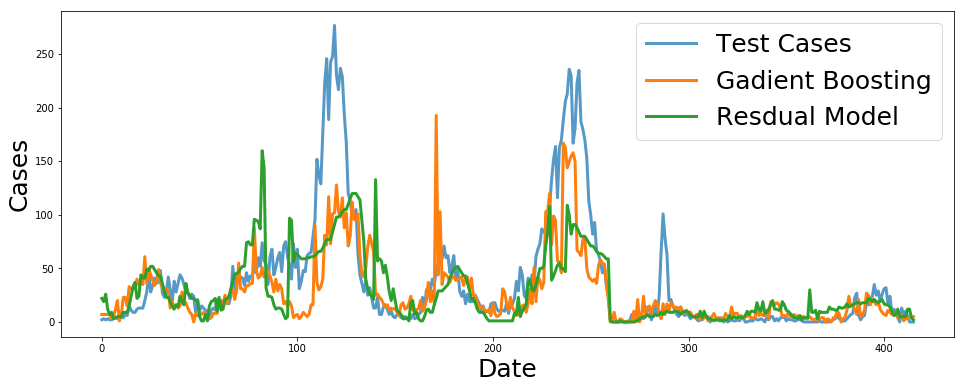

In [148]:
residuals = pd.read_csv('submissions/residual_prediction_1.csv')['total_cases']
residual = pd.read_csv('submissions/residual_prediction_weather2_RF_1_features.csv')['total_cases']
rolling = pd.read_csv('submissions/rolling_window_RF_18:23.csv')['total_cases']

ensemble_pred = pd.read_csv('submissions/ensemble_rf_2_gb_new_round2.csv')['total_cases']

plt.figure(figsize=(16, 6))
plt.plot(predicted_cases2.index, test_cases, label = 'Test Cases', linewidth = 3, alpha = .75)
plt.plot(rolling.index, rolling, label = 'Gadient Boosting', linewidth = 3)
plt.plot(residual.index, residual, label = 'Resdual Model', linewidth = 3)
# plt.plot(ensemble_pred.index, ensemble_pred, label = 'Ensemble Model', linewidth = 3)

# print (mean_absolute_error(pred_cases[:520], cases_iq))

plt.legend(fontsize=25)
plt.xlabel('Date', fontsize = 25)
plt.ylabel('Cases', fontsize = 25)

In [134]:
X_test = pd.read_csv('dataset/dengue_features_test.csv')
test_dataset = test_dataset.reset_index(drop=True)
Xy_test = pd.concat([test_dataset.total_cases, X_test], axis=1) 
# print(Xy_train)

In [135]:
Xy_sj = Xy_test.loc[Xy_train.city == 'sj', :]
Xy_iq = Xy_test.loc[Xy_train.city == 'iq', :]


In [137]:
Xy_sj.corr().total_cases.sort_values(ascending=False)


total_cases                              1.000000
reanalysis_avg_temp_k                    0.316069
reanalysis_max_air_temp_k                0.315009
reanalysis_air_temp_k                    0.311866
reanalysis_min_air_temp_k                0.307891
reanalysis_specific_humidity_g_per_kg    0.296948
reanalysis_dew_point_temp_k              0.286796
year                                     0.280647
station_avg_temp_c                       0.262266
station_min_temp_c                       0.244787
weekofyear                               0.182416
station_max_temp_c                       0.178282
reanalysis_relative_humidity_percent     0.122141
precipitation_amt_mm                     0.052104
reanalysis_sat_precip_amt_mm             0.052104
station_precip_mm                        0.033577
reanalysis_precip_amt_kg_per_m2          0.021214
reanalysis_tdtr_k                        0.017026
ndvi_sw                                 -0.043059
ndvi_se                                 -0.053451


In [138]:
Xy_iq.corr().total_cases.sort_values(ascending=False)


total_cases                              1.000000
reanalysis_min_air_temp_k                0.298507
reanalysis_specific_humidity_g_per_kg    0.226276
reanalysis_dew_point_temp_k              0.219695
station_min_temp_c                       0.212939
reanalysis_precip_amt_kg_per_m2          0.200183
reanalysis_relative_humidity_percent     0.115399
year                                     0.115278
station_max_temp_c                       0.101555
station_avg_temp_c                       0.096536
reanalysis_air_temp_k                    0.094677
reanalysis_avg_temp_k                    0.077011
ndvi_sw                                  0.062073
ndvi_ne                                  0.049104
station_precip_mm                        0.029909
precipitation_amt_mm                    -0.002015
reanalysis_sat_precip_amt_mm            -0.002015
ndvi_se                                 -0.019391
ndvi_nw                                 -0.022109
reanalysis_max_air_temp_k               -0.098280
